# Welcome to the first tutorial

In this example you will be shown how to assess the accuracy of instance segmentation.

From semantic segmentation we shall:
1) Seperate the semantic segmentation into individual elements
2) Create the individual mask for each element and create a list of masks
3) Compute the accuracy of instance segmentation in accordance to the metrics specified in ...

Later tutorials will cover when the data is not just 2D but 3D. Addititinally later tutorials will cover when there are multiple classes (multi-class instance segmentation), e.g. multiple cell types. 

To summarise: In this tutorial we will be assessing the accuracy of a predicted instance segmentation in comparison to some reference instance segmentation.
These segementations will be binary, i.e. it will only have two classes: background and mask.

### Plan
<ol type="A">
  <li>Import the relevent libraries</li>
  <li>Load the reference and predicted semantic segmentations</li>
</ol>

1) Seperate the semantic segmentations into individual elements
2) Create the individual mask for each element and create a list of masks
3) Compute the accuracy of instance segmentation in accordance to the metrics specified in ...

### A) Import the relevent libraries 

In [1]:
# import the relevent libraries
# add the metricsReloaded path
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))

# libraries for the example
import glob
from MetricsReloaded.processes.overall_process import ProcessEvaluation
import os
import numpy as np
import pickle as pkl
import pandas as pd
from MetricsReloaded.utility.utils import MorphologyOps

# Required for viualisation
import matplotlib.pyplot as plt

### B) Load the reference and predicted segmentations

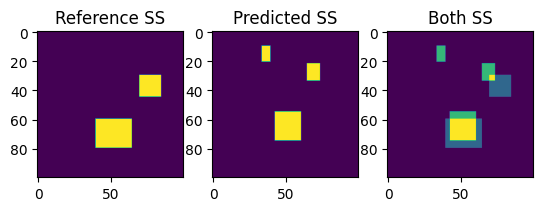

In [2]:
# Create example reference and predicted semantic segmentations (SS)
sizeOfImg = [100,100]

# Initialise semantic segmentation 
ref_SS = np.zeros(sizeOfImg)
pred_SS = np.zeros(sizeOfImg)

# Fill SS with segmentations
ref_SS[60:80,40:65] = 1
ref_SS[30:45,70:85] = 1

pred_SS[55:75, 43:61] = 1
pred_SS[22:34, 65:74] = 1
pred_SS[10:21, 34:40] = 1

# Show the SS
plt.subplot(1,3,1)
plt.imshow(ref_SS)
plt.title("Reference SS")
plt.subplot(1,3,2)
plt.imshow(pred_SS)
plt.title("Predicted SS")
plt.subplot(1,3,3)
plt.imshow(ref_SS+2*pred_SS) # sum is simply a trick for visualising
plt.title("Both SS")
plt.show()

The reference and predicted semantic segmentations have two overlapping instances. Another instance has also been predicted.

Later, each pair of overlapping 

### 1 + 2) Seperate the semantic segmentations into individual elements

In [3]:
# Set the neighborhood parameter
neigh = 6

# Seperate the semantic segmentations into a list of elements
ref_list,_,_ = MorphologyOps(ref_SS, neigh=neigh).list_foreground_component()
pred_list,_,_ = MorphologyOps(pred_SS, neigh=neigh).list_foreground_component()

Text(0.5, 1.0, 'Pred SS element 1')

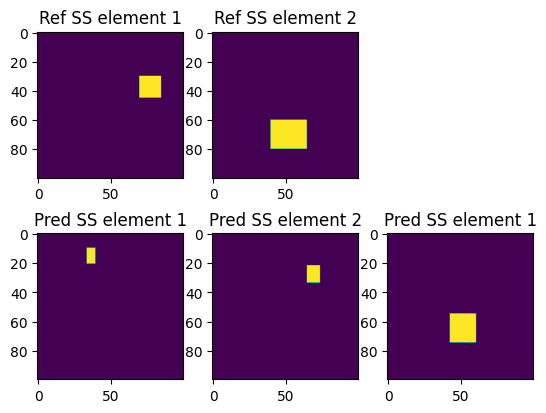

In [4]:
# Plot the semantic segmentation split into individual elements
plt.subplot(2,3,1)
plt.imshow(ref_list[0])
plt.title("Ref SS element 1")
plt.subplot(2,3,2)
plt.imshow(ref_list[1])
plt.title("Ref SS element 2")

plt.subplot(2,3,4)
plt.imshow(pred_list[0])
plt.title("Pred SS element 1")
plt.subplot(2,3,5)
plt.imshow(pred_list[1])
plt.title("Pred SS element 2")
plt.subplot(2,3,6)
plt.imshow(pred_list[2])
plt.title("Pred SS element 1")

We see that each semantic segmentation has been split into individual elements.

Later, each of the elements in the reference will be compared to each of the elements in the prediction.

### 3) Compute the accuracy of instance segmentation in accordance to the metrics specified in ...

In [5]:
# Assing labels for the instances 
# An explanation of what each of these mean would be good
pred_class = [1]*len(pred_list)
pred_prob = [1]*len(pred_list)
ref_class = [1]*len(ref_list)
list_values = [1]

dict_file = {}
dict_file['pred_prob'] = [pred_prob]
dict_file['ref_class'] = [ref_class]
dict_file['pred_class'] = [pred_class]
dict_file['pred_loc'] = [pred_list]
dict_file['ref_loc'] = [ref_list]
dict_file['file'] = [""]
dict_file["list_values"] =[1]

PE = ProcessEvaluation(
    dict_file,
    "Instance Segmentation",
    localization="mask_iou",
    assignment="greedy_matching",
    measures_overlap=['fbeta','numb_ref','numb_pred','numb_tp','numb_fp','numb_fn'],
    measures_mcc=[],
    measures_pcc=["fbeta",'numb_ref','numb_pred','numb_tp','numb_fp','numb_fn'],
    measures_mt=[],
    measures_boundary=['masd','nsd','boundary_iou'],
    measures_detseg=['PQ'],
    thresh_ass=0.000001
)

In [6]:
# Compute the metrics
df_resdet, df_resseg, df_resmt, df_resmcc = PE.process_data()

[1]
(array([0, 1, 2], dtype=int64),)
3 2 1 0
(3, 2) (3, 100, 100) (2, 100, 100)
(3, 2)
Number of categories: TP FN FP (2, 4) (0, 0) (1, 4)
No ambiguity in matching
1.0
2.0
assignment done
4.958753394598088 8.462212649614164 38 56 473.88390837839324 188.43262899472734
[9.43398113 8.94427191 8.54400375 8.24621125 8.06225775 8.
 8.         8.         8.         8.60232527 0.         0.
 0.         0.         0.         0.         0.         7.
 7.81024968 0.         0.         0.         0.         0.
 0.         0.         6.         7.07106781 0.         0.
 0.         0.         0.         0.         0.         5.
 6.40312424 0.         0.         0.         0.         0.
 0.         0.         4.         5.83095189 0.         0.
 0.         0.         0.         0.         0.         3.
 5.38516481 0.         0.         0.         0.         0.
 0.         0.         2.         5.09901951 0.         0.
 0.         0.         0.         0.         0.         1.
 5.         0.         0

### The first output - df_resdet - prints a table of different metrics 

In [7]:
df_resdet

,fbeta,numb_ref,numb_pred,numb_tp,numb_fp,numb_fn,PQ,label
0,0.8000,2.0000,3.0000,2.0000,1.0000,0.0000,0.20324,1


### The second output - df_resseg - prints ...

In [8]:
df_resseg

,masd,nsd,boundary_iou,fbeta,numb_ref,numb_pred,numb_tp,numb_fp,numb_fn,label
0,6.7105,0.1277,0.0217,0.0961,225.0000,108.0000,16.0000,92.0000,209.0000,1
1,3.8974,0.0759,0.0128,0.6279,500.0000,360.0000,270.0000,90.0000,230.0000,1


In [9]:
df_resmt

,label
0,1
